# **Predicting Customer Churn in a Telecom Company**

### **Introduction**

In today's competitive market, subscription-based businesses face significant challenges in retaining customers. Customer churn, or the rate at which customers discontinue their subscription services, is a critical metric for these businesses. A high churn rate can significantly impact revenue and growth, making it essential for companies to identify and mitigate factors leading to customer churn.

This project aims to develop a predictive model to identify customers who are likely to churn. By leveraging historical data on customer behavior, demographics, and interactions, we can build a machine learning model that accurately predicts churn. This enables the business to implement targeted retention strategies, enhancing customer satisfaction and loyalty while reducing the overall churn rate.

### **Business Understanding**

Subscription-based businesses rely heavily on recurring revenue from their customer base. Losing customers not only affects immediate revenue but also increases the cost of acquiring new customers. Therefore, understanding the factors that contribute to customer churn and being able to predict churn is crucial for sustaining long-term growth and profitability.

**Objective**

The primary objective of this project is to predict customer churn for a subscription-based business. By identifying customers at risk of leaving, the business can take proactive measures to retain them, thereby reducing churn rates and improving customer retention.

**Key Questions**

- Which customers are likely to churn?

By predicting the likelihood of churn, the business can focus retention efforts on high-risk customers.

- What are the key factors contributing to churn?

Understanding these factors helps in refining business strategies and improving customer experience.

- How can the business reduce the churn rate?

Based on predictions, the business can design targeted interventions to retain customers.

### **Metric of Success**

The primary metric of success for this project is Precision, with a target range of 80% to 90%.

Precision: This metric measures the accuracy of identifying customers likely to churn, ensuring that retention efforts are focused effectively. A higher precision means fewer resources wasted on false positives, maximizing the impact of our strategies.

## **Data Understanding**

- customerID: A unique identifier for each customer.

- gender: The gender of the customer (e.g., Male or Female).

- SeniorCitizen: Indicates whether the customer is a senior citizen (1 for Yes, 0 for No).

- Partner: Indicates whether the customer has a partner (True for Yes, False for No).

- Dependents: Indicates whether the customer has dependents (True for Yes, False for No).

- tenure: The number of months the customer has stayed with the company.

- PhoneService: Indicates whether the customer has a phone service (True for Yes, False for No).

- MultipleLines: Indicates whether the customer has multiple lines (Yes, No, or NaN if not applicable).

- InternetService: The type of internet service the customer has (e.g., DSL, Fiber optic, No).

- OnlineSecurity: Indicates whether the customer has online security service (Yes, No, or NaN if not applicable).

- OnlineBackup: Indicates whether the customer has online backup service (Yes, No, or NaN if not applicable).

- DeviceProtection: Indicates whether the customer has device protection service (Yes, No, or NaN if not applicable).

- TechSupport: Indicates whether the customer has tech support service (Yes, No, or NaN if not applicable).

- StreamingTV: Indicates whether the customer has streaming TV service (Yes, No, or NaN if not applicable).

- StreamingMovies: Indicates whether the customer has streaming movies service (Yes, No, or NaN if not applicable).

- Contract: The type of contract the customer has (e.g., Month-to-month, One year, Two year).

- PaperlessBilling: Indicates whether the customer is enrolled in paperless billing (True for Yes, False for No).

- PaymentMethod: The payment method used by the customer (e.g., Electronic check, Mailed check, Bank transfer, Credit card).

- MonthlyCharges: The amount charged to the customer monthly.

- TotalCharges: The total amount charged to the customer.

- Churn: Indicates whether the customer has churned (left the company) (Yes or No).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data1 = pd.read_csv('data/df_first_3000.csv')
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [4]:
data2 = pd.read_csv('data/df_second_2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [6]:
data3 = pd.read_csv('data/df_last_2000.csv')
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [7]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [8]:
# Convert 'Churn' column in data1 and data2 to 'Yes' and 'No'
data1['Churn'] = data1['Churn'].map({True: 'Yes', False: 'No'})
data1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,No


In [10]:
mergedTrain_data = pd.concat([data1, data3], ignore_index= True)
mergedTrain_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,Yes


In [12]:
# Check for duplicates
duplicates = mergedTrain_data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')


Number of duplicate rows: 0


In [13]:
# Check for missing values
missing_values = mergedTrain_data.isnull().sum()
print('Missing values in each column:\n', missing_values)


Missing values in each column:
 customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64


In [15]:
mergedTrain_data['TotalCharges'] = pd.to_numeric(mergedTrain_data['TotalCharges'], errors= 'coerce')
# Fill missing values in 'TotalCharges' with the mean of the column
mergedTrain_data['TotalCharges'] = mergedTrain_data['TotalCharges'].fillna(mergedTrain_data['TotalCharges'].mean())

# Fill missing values in categorical columns with the mode of each column
for column in ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    mergedTrain_data[column] = mergedTrain_data[column].fillna(mergedTrain_data[column].mode()[0])

# Fill missing value in 'Churn' column with the mode
mergedTrain_data['Churn'] = mergedTrain_data['Churn'].fillna(mergedTrain_data['Churn'].mode()[0])


# Verify if there are any missing values left
missing_values_after_filling = mergedTrain_data.isnull().sum()
print('Missing values after filling:\n', missing_values_after_filling)

Missing values after filling:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [16]:
mergedTrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [17]:
mergedTrain_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000,5043.000000
mean,0.162403,32.576641,65.090214,2302.062861
std,0.368857,24.529807,30.068133,2267.682399
min,0.000000,0.000000,18.400000,18.799999
25%,0.000000,9.000000,35.775000,418.000000
50%,0.000000,29.000000,70.550003,1406.000000
75%,0.000000,56.000000,90.050003,3857.575073
max,1.000000,72.000000,118.650002,8670.100000


## **Exploratory Data Analysis**

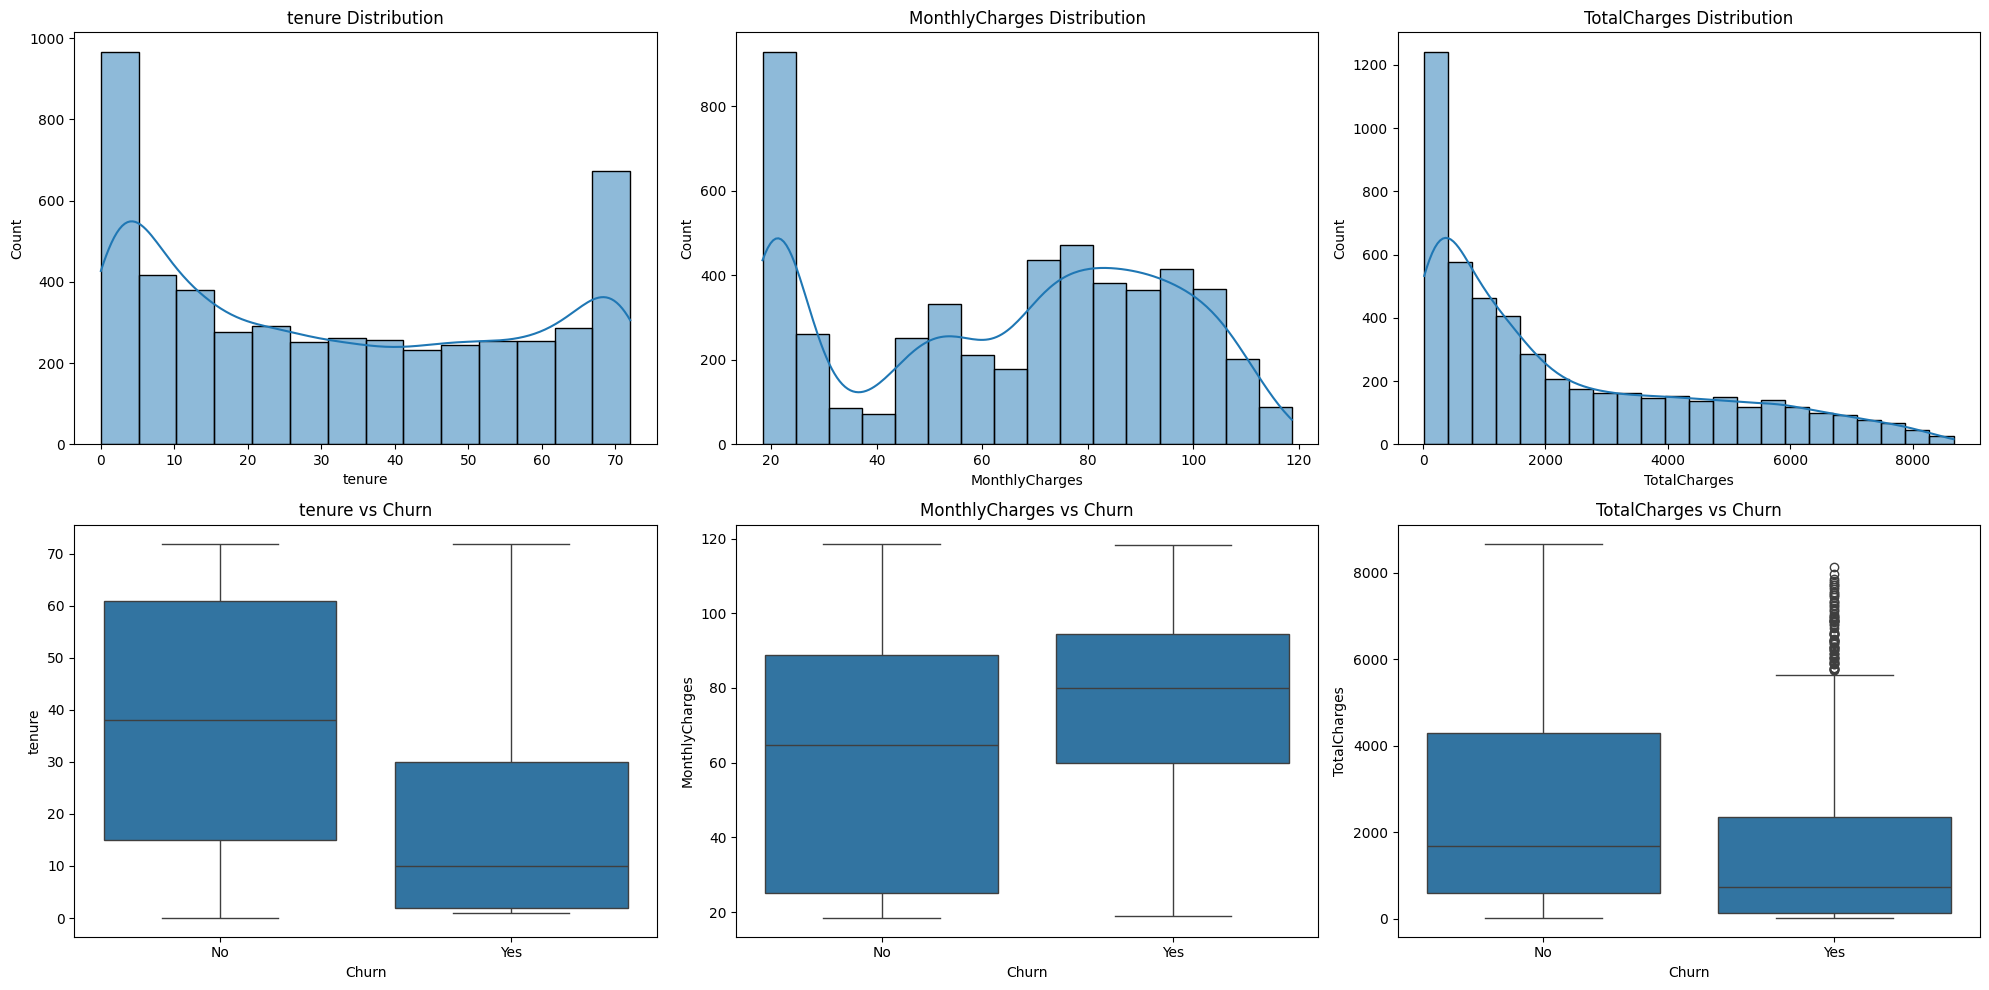

In [21]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns), i)
    sns.histplot(data=mergedTrain_data, x=column, kde=True)
    plt.title(f'{column} Distribution')
    
    plt.subplot(2, len(numerical_columns), i + len(numerical_columns))
    sns.boxplot(data=mergedTrain_data, x='Churn', y=column)
    plt.title(f'{column} vs Churn')

plt.tight_layout()
plt.show()

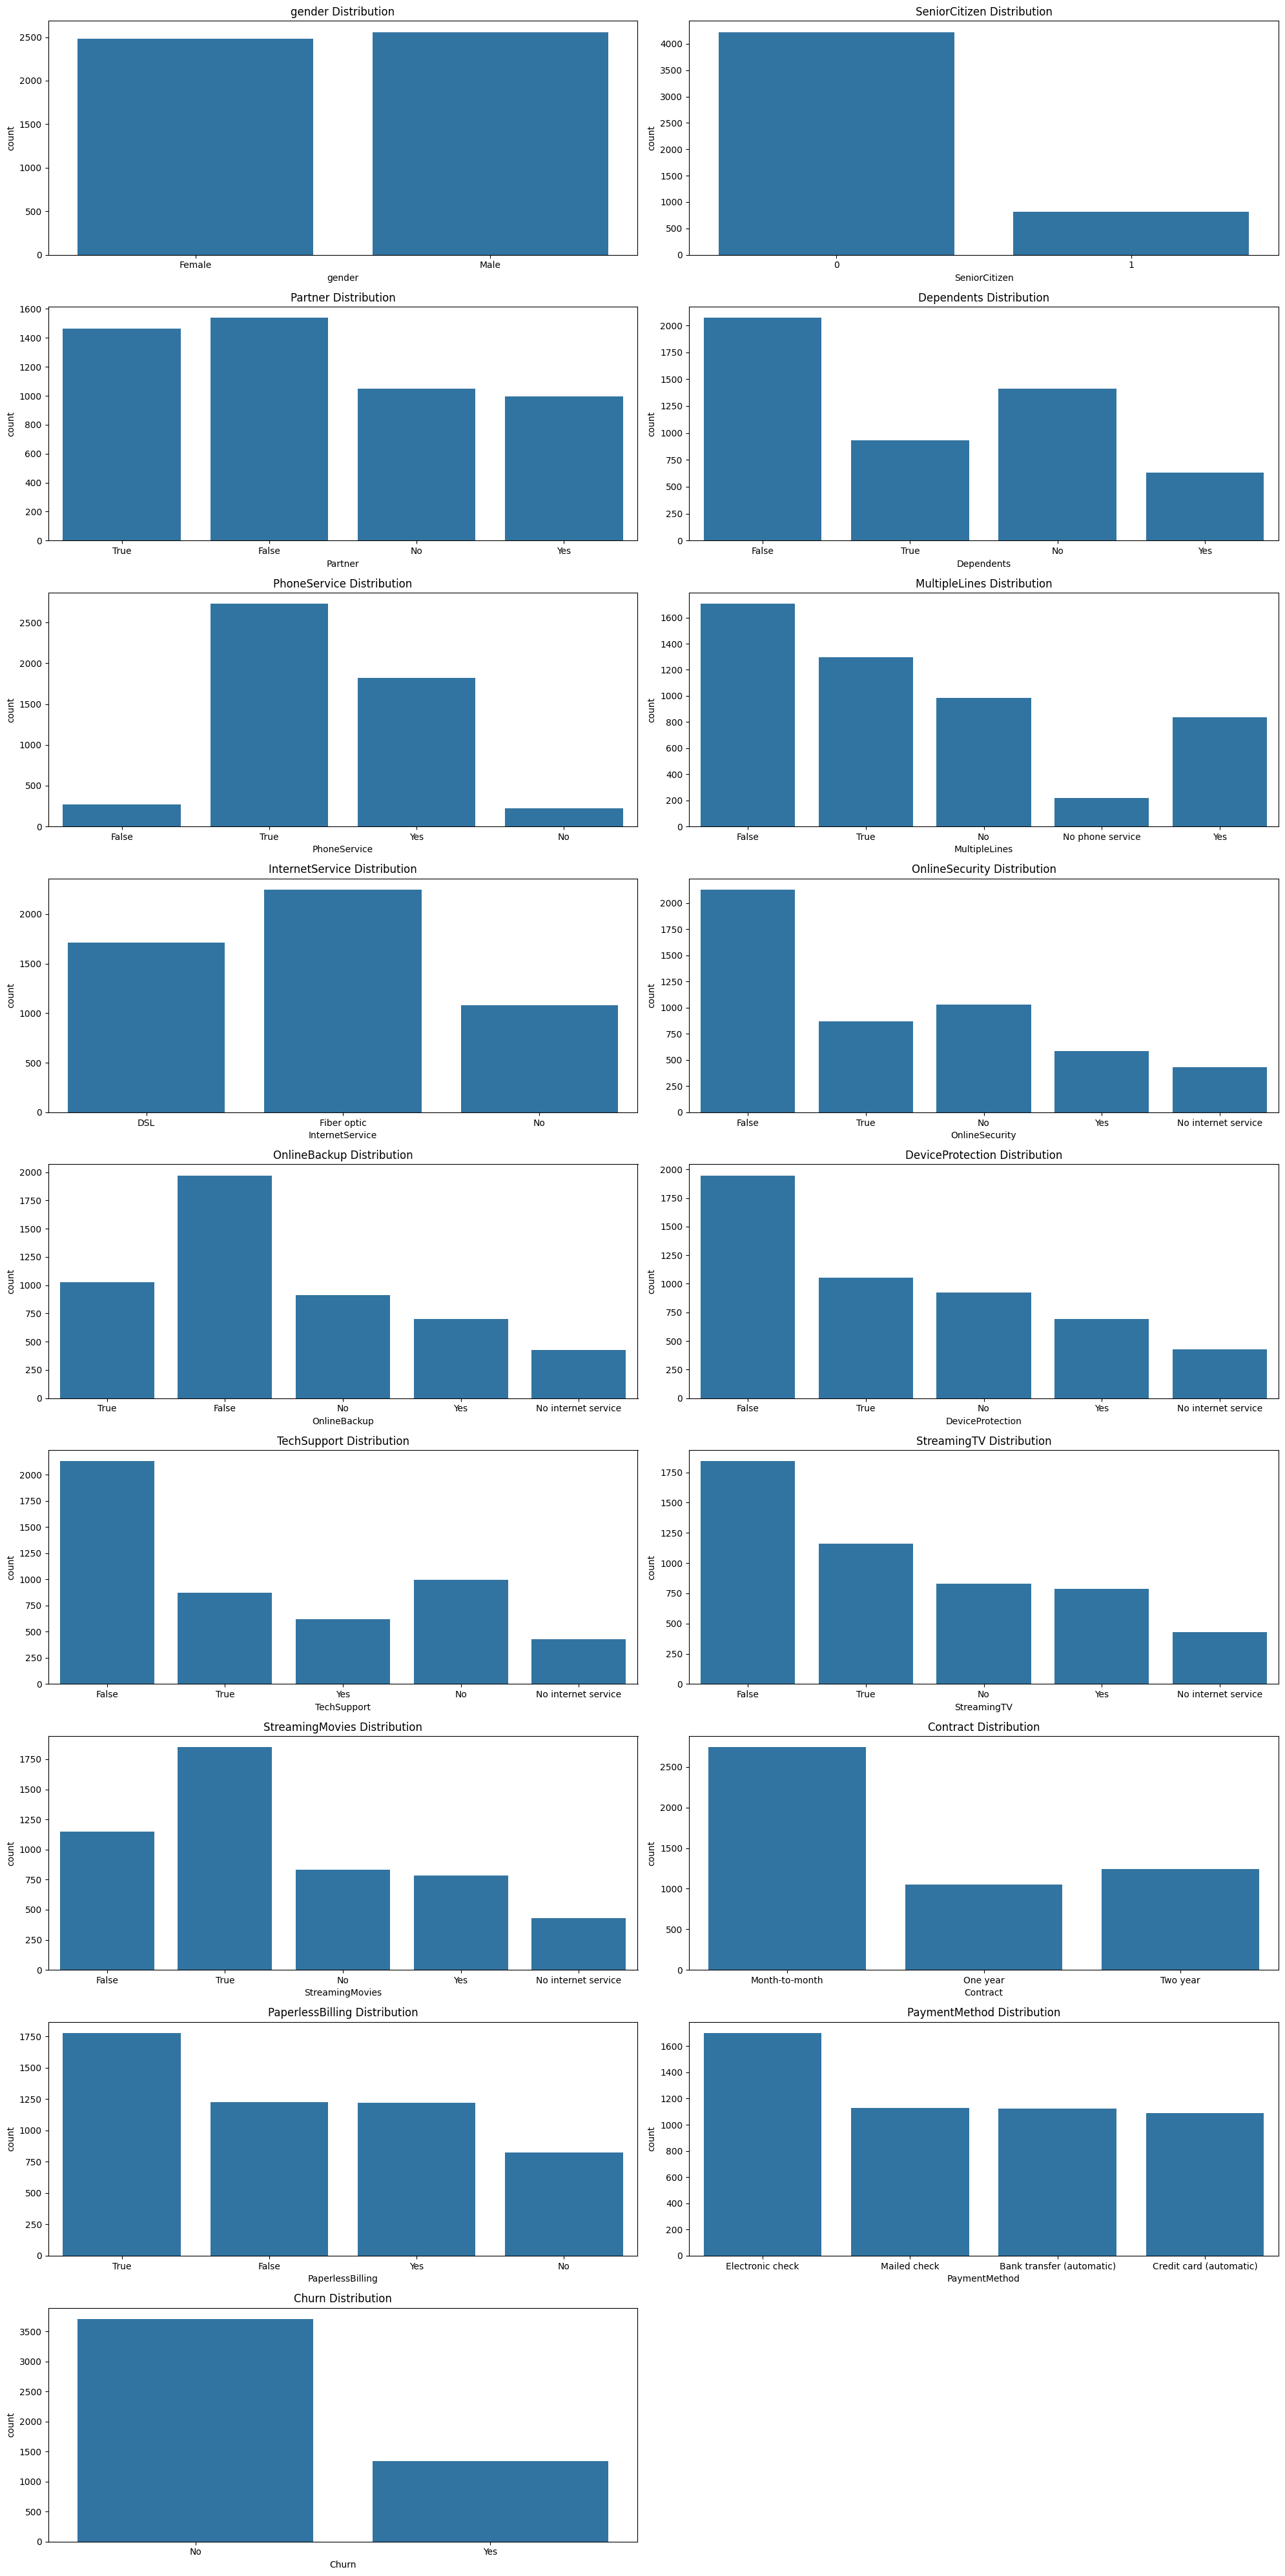

In [22]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(20, 40))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 2 + 1, 2, i)
    ax = sns.countplot(data=mergedTrain_data, x=column)
    plt.title(f'{column} Distribution')
   

plt.tight_layout()
plt.show()

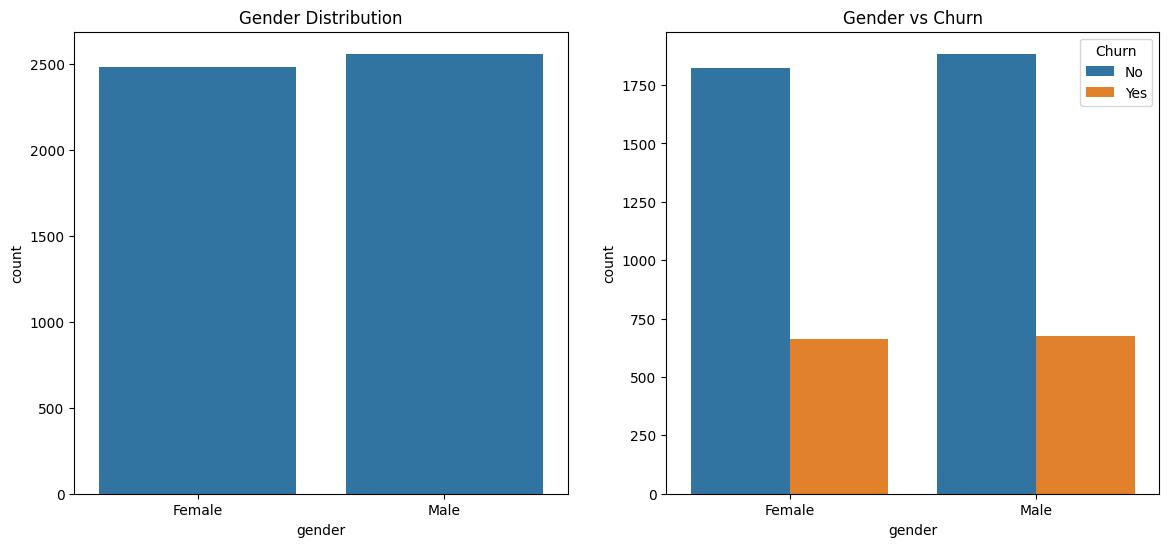

In [18]:
# Set up the figure
plt.figure(figsize=(14, 6))

# Gender distribution
plt.subplot(1, 2, 1)
sns.countplot(data=mergedTrain_data, x='gender')
plt.title('Gender Distribution')

# Gender vs Churn
plt.subplot(1, 2, 2)
sns.countplot(data=mergedTrain_data, x='gender', hue='Churn')
plt.title('Gender vs Churn')

plt.show()

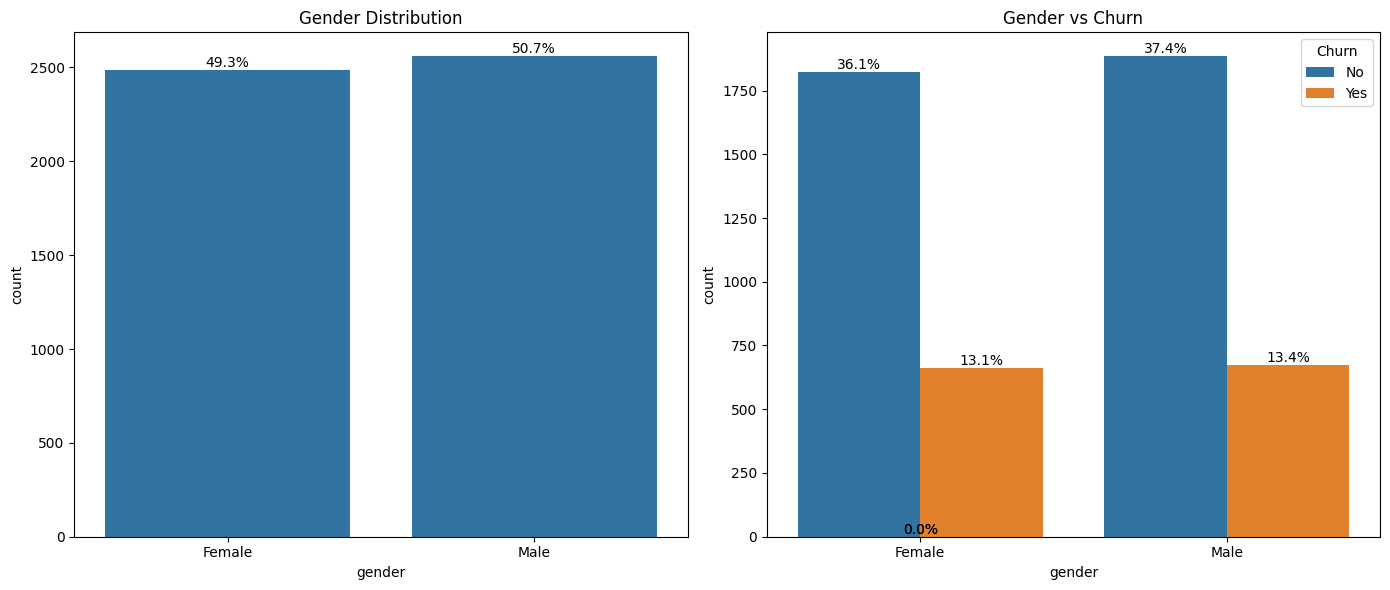

In [19]:
def add_percentage(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{height / total_count * 100:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set up the figure
plt.figure(figsize=(14, 6))

# Gender distribution
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=mergedTrain_data, x='gender')
plt.title('Gender Distribution')
add_percentage(ax1, len(mergedTrain_data))

# Gender vs Churn
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=mergedTrain_data, x='gender', hue='Churn')
plt.title('Gender vs Churn')
add_percentage(ax2, len(mergedTrain_data))

plt.tight_layout()
plt.show()

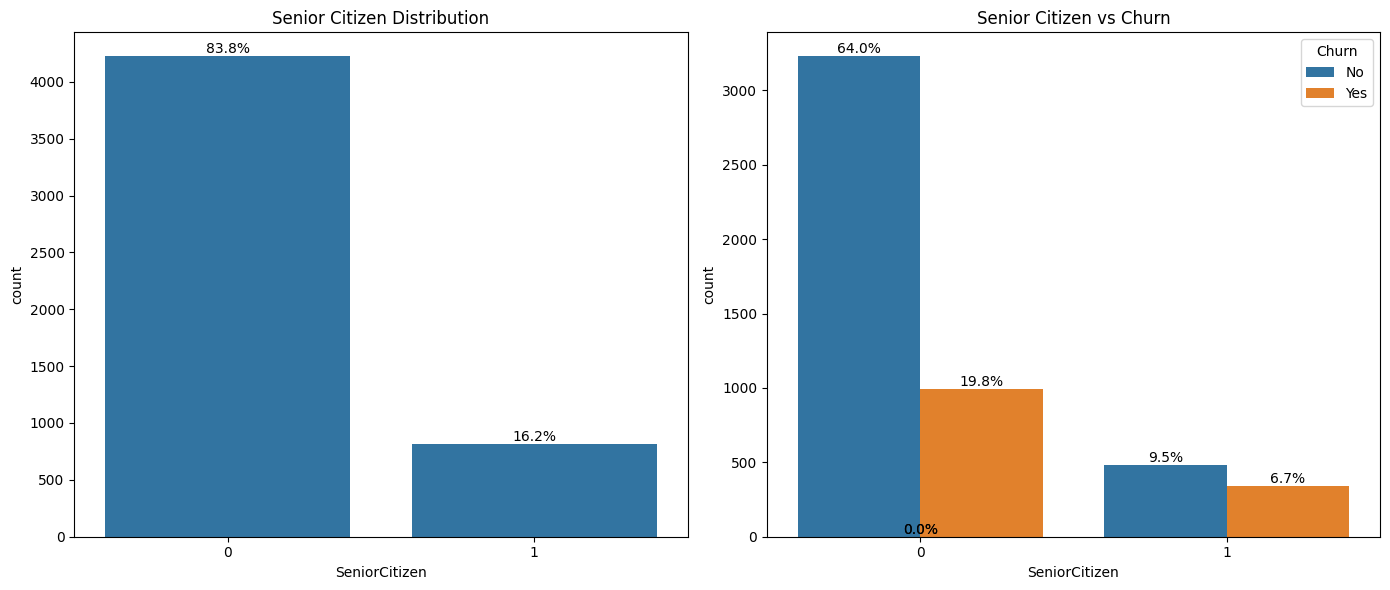

In [20]:
# Set up the figure
plt.figure(figsize=(14, 6))

# SeniorCitizen distribution
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=mergedTrain_data, x='SeniorCitizen')
plt.title('Senior Citizen Distribution')
add_percentage(ax1, len(mergedTrain_data))

# SeniorCitizen vs Churn
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=mergedTrain_data, x='SeniorCitizen', hue='Churn')
plt.title('Senior Citizen vs Churn')
add_percentage(ax2, len(mergedTrain_data))

plt.tight_layout()
plt.show()